In [1]:
from portfolio import Portfolio
from data_handler import DataHandler
from environment import StockEnv
import numpy as np    
import tensorflow as tf

In [2]:
window = 7
train_split = 0.8
amount = 10_000
assets = ["ADM", "IBM", "MSFT", "AMZN", "ABC"]
weights = np.random.random(len(assets))

In [3]:
portfolio = Portfolio(asset_names=assets, weights=weights,amount=amount,
                      mode="train", window=window, train_split=train_split, creation_date="2009-05-07")
data_handler = DataHandler(assets)
env = StockEnv(portfolio=portfolio, data_handler=data_handler, mode="train")

In [4]:
for i in range(150):
    if i % 10 == 0:
        portfolio.tick(tf.nn.softmax(np.random.random(len(assets))))
    else:
        portfolio.tick()

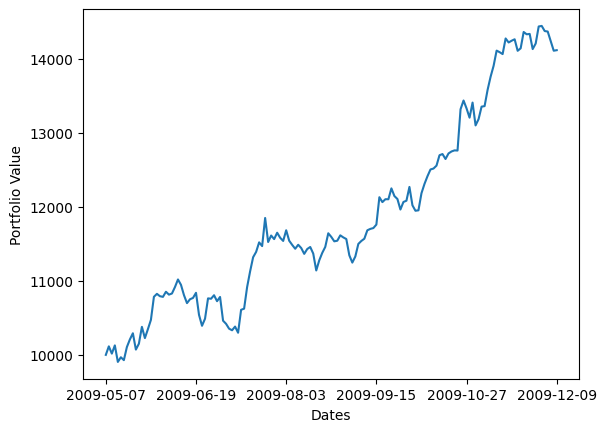

In [5]:
portfolio.plot()

In [6]:
portfolio.get_info()

{'Date': '2009-12-09',
 'Profit': 4114.674610989112,
 'Profit %': 41.14674610989112,
 'Initial value': 10000,
 'Total value': 14114.674610989112}

In [7]:
states = env.get_state()

In [8]:
states[2][0]

array([0.33408333, 0.14864881, 0.17296375, 0.12384653, 0.22045757])

In [9]:
from models import LSTMAgent

In [10]:
agent = LSTMAgent(window_length=window, n_stocks=len(assets), actor_lr=0.03, critic_lr = 0.01, tau=1e-3, discount_rate=0.95)

In [14]:
act = agent.make_action(states, 0)

1/1 [==============================] - 0s 32ms/step


In [15]:
env.step(act)

([array([[[ 24.92000008,  24.92000008,  24.47999954,  24.69000053,
             6.60949993,   6.8039999 ,   6.6079998 ,   6.7954998 ,
            29.14999962,  29.45000076,  29.        ,  29.40999985,
           119.61759186, 121.03250122, 119.42638397, 120.79350281,
            30.51000023,  30.85000038,  30.03000069,  30.80999947],
          [ 24.75      ,  24.95000076,  24.70000076,  24.85000038,
             6.84700012,   6.96750021,   6.7874999 ,   6.92500019,
            29.52000046,  30.04999924,  29.40999985,  30.01000023,
           121.69216156, 122.74378967, 121.27150726, 122.31357574,
            31.25      ,  31.95999908,  31.07999992,  31.65999985],
          [ 24.51000023,  24.93000031,  24.51000023,  24.76000023,
             6.95749998,   7.1335001 ,   6.94799995,   7.11250019,
            29.89999962,  29.98999977,  29.64999962,  29.78000069,
           121.72084045, 122.74378967, 121.56787872, 121.61567688,
            31.01000023,  31.93000031,  30.89999962,  31.600